In [65]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# A little Statistics

## 1. Normal Distribution
The normal distribution is a type of continuous distribution. It's general formula is $$\frac{1}{(\sigma\sqrt2\pi)}e^{-0.5(\frac{x-\mu}{\sigma})^2}$$
The parameters $\mu, \sigma$ stand for the mean and the standard deviation of the distribution. In our case, we will be looking at a special
case called the standard normal which has a mean of 0 and s.d of 1.

In [96]:
# Trying different values for sigma and checking for consistency on z-table
vals = [0, 1, 2, 5]
sigma_probs = 1 - norm.cdf(vals)
print('The probabilities corresponding to the sigma values are ' + str(sigma_probs))
z_probs = norm.cdf(vals)
print('The probabilities from the z_table corresponding to the sigma values are ' + str(z_probs))

The probabilities corresponding to the sigma values are [5.00000000e-01 1.58655254e-01 2.27501319e-02 2.86651572e-07]
The probabilities from the z_table corresponding to the sigma values are [0.5        0.84134475 0.97724987 0.99999971]


The sigma probabilities are consistent with the z-table probabilities since the sigma probabilites are the right hand integral while the z-table ones are left side integrals.

The values corresponding to the sigma values from the z-table are listed below

| Sigma Value | Z-Table Value |  Probability |   |   |
|-------------|---------------|---|---|---|
| 0           | 0.5           | 0.5  |   |   |
| 1           | 0.84          |  0.84 |   |   |
| 2           | 0.97          |  0.97 |   |   |
| 5           | 0.99          |  0.99 |   |   |

In [67]:
# Trying different values for probabilities and checking for consistency for sigma values
sigma_vals = norm.ppf(z_probs)
print('The sigma values corresponding to known probabilities are ' + str(sigma_vals))

The sigma values corresponding to known probabilities are [0. 1. 2. 5.]


Once again, considering that sigma probabilities are right side integrals we can use the probabilities that should correspond to known sigma values to ensure that we have the right sigma values.

## 2. Rayleigh Distribution
The Rayleigh distribution is a continuous probability distribution for non-negative valued random variables. It's general formula is $$\frac{x}{\sigma^2}e^{\frac{-x^2}{2\sigma^2}}, for  x > 0$$
Here $\sigma$ is the scale parameter

In [110]:
d = stats.rayleigh.rvs(scale = 0.01, size = 100000)

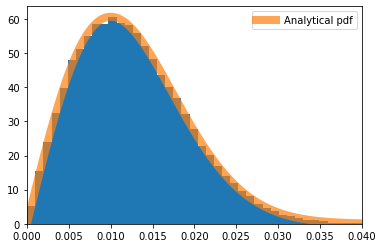

In [111]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.xlim([0, 0.04])
x = np.linspace(0, 0.04,1000)
ax.plot(x,stats.rayleigh.pdf(x, scale = 0.01),linewidth = 8,alpha = 0.7, label = 'Analytical pdf')
plt.legend()
plt.show()

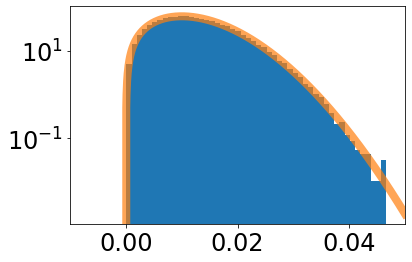

In [90]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.xlim([-0.01,0.05])
x = np.linspace(0,0.05,1000)
ax.plot(x,stats.rayleigh.pdf(x, scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

## 3. Sigma Calculation
For the rayleigh distribution, the value chosen for the hypothetical measurement is 0.028.
The statistical question being asked will be: The probability of the background giving a data point that is as or more signal-like than the reading that I have is the same probability as if my data was X$\sigma$ away from the mean

The mathematical representation of this would be: $$\int_{0.028}^{\infty} \frac{x}{\sigma^2}e^{\frac{-x^2}{2\sigma^2}} dx$$

In [ ]:
prob = stats.rayleigh.cdf(0.028, scale = 0.01)
sigma_val = stats.rayleigh.ppf(prob, scale = 0.01)
print(prob)
print('The corresponding sigma value is ' + str(sigma_val))

In [113]:
hypo_vals = [-0.004, 0.012, 0.023, 0.033]
hypo_probs = stats.rayleigh.cdf(hypo_vals, scale = 0.01)
hypo_sigmas = stats.rayleigh.ppf(hypo_probs, scale = 0.01)
print('The hypothetical sigma values are ' + str(hypo_sigmas))

The hypothetical sigma values are [0.    0.012 0.023 0.033]


The pattern that we see is that the sigma values increase the closer we get to the extreme right limit of the distribution.

# Non-Continuous Distributions

## Binomial Distribution
The binomial distribution is the discrete probability distribution of the number of successes in a sequence of n independent experiments. It's general formula is $$\binom{n}{k} p^k (1-p)^{n-k}$$
The parameters n and p represent the number of tries, the probability of success, and k is the number of successes.

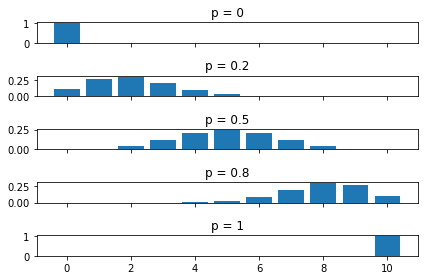

In [161]:
fig, axs = plt.subplots(5, sharex=True)
n = 10
r_values = list(range(n + 1)) 
axs[0].bar(r_values, [stats.binom.pmf(r, n, 0) for r in r_values])
axs[0].set_title('p = 0')
axs[1].bar(r_values, [stats.binom.pmf(r, n, 0.2) for r in r_values])
axs[1].set_title('p = 0.2')
axs[2].bar(r_values, [stats.binom.pmf(r, n, 0.5) for r in r_values])
axs[2].set_title('p = 0.5')
axs[3].bar(r_values, [stats.binom.pmf(r, n, 0.8) for r in r_values])
axs[3].set_title('p = 0.8')
axs[4].bar(r_values, [stats.binom.pmf(r, n, 1) for r in r_values])
axs[4].set_title('p = 1')
fig.tight_layout()
plt.show()

As we can see, as the probability for success increases the distribution shifts towards the right showing a higher change of more successful trials. When the probability for success is 0.5, the distribution resembles a normal distribution.

The statistical question being asked will be: The probability of the background giving a data point that is as or more signal-like than the reading that I have is the same probability as if my data was X$\sigma$ away from the mean.
Data point = 6 successes

In [179]:
# Probability associated to data point
probs_binom = stats.binom.cdf(6, 10, 0.6)

# Sigma associated to probability
sigma_binom = stats.binom.ppf(probs_binom, 10, 0.6)
print('The sigma value is ' + str(sigma_binom))

The sigma value is 6.0


Given that we are working with a discrete distribution (binomial), this means that our experiment can only have one of two values and each trial's result will be independent of the last.